<a href="https://colab.research.google.com/github/AlecTraas/computational-geo-lab/blob/main/Colab/Kai/quickhull_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

In [3]:
parseSides = lambda l, r, ps: (
  np.array([p for p in ps if aboveLine(l, r, p)]),
  np.array([p for p in ps if not aboveLine(l, r, p)])
)

In [4]:
def runProgram(num_points):
  points = sorted([[rnd.random()*10, rnd.random()*10] for _ in range(num_points)], key=lambda x: x[0])

  left = points[0]
  right = points[-1]

  hull_set = [left]

  upper_set, lower_set = parseSides(left, right, points)

  if quickHull(upper_set, left, right, 1) != None:
    hull_set += sorted([arr.tolist() for arr in quickHull(upper_set, left, right, 1)]) # resort by x, smallest to largest

  hull_set.append(right)

  if quickHull(lower_set, left, right, -1) != None:
    hull_set += sorted([arr.tolist() for arr in quickHull(lower_set, left, right, -1)],reverse=True) # resort by x, largest to smallest

  points = np.array([np.array(inner_list) for inner_list in points])
  hull_set = np.array([np.array(inner_list) for inner_list in hull_set])

  plt.scatter(points[:, 0], points[:, 1])
  plt.plot(hull_set[:, 0], hull_set[:, 1], color='red')

  return hull_set

In [5]:
def aboveLine(a,b,c):
  return (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0]) > 0

In [6]:
def furthestP(points,a,b):
  dist = 1/2 * np.abs(a[0]*(b[1] - points[:,1]) + b[0]*(points[:,1] - a[1]) + points[:,0]*(a[1] - b[1]))
  return points[np.argmax(dist)]

In [7]:
def quickHull(points,a,b,f):
  if points.size == 0 or a is None or b is None:
    return None

  c = furthestP(points,a,b)

  hull_set = []
  hull_set += [c]

  indices = np.where((points == c).all(axis=1))[0]
  points = np.delete(points, indices, axis=0)

  parseSides = lambda l, r, ps: (
    np.array([p for p in ps if aboveLine(l, r, p)]),
    np.array([p for p in ps if not aboveLine(l, r, p)])
  )

  set_1a, set_1b = parseSides(a,c,points)
  set_2b, set_2a = parseSides(b,c,points)

  if f == 1:
    a = quickHull(set_1a, a, c, 1)
    b = quickHull(set_2a, c, b, 1)
    if a != None:
      hull_set += a
    if b != None:
      hull_set += b

  else:
    a = quickHull(set_1b, a, c, -1)
    b = quickHull(set_2b, c, b, -1)
    if a != None:
      hull_set += a
    if b != None:
      hull_set += b

  return hull_set

array([[0.24541106, 7.3863962 ],
       [4.00596556, 9.38607137],
       [8.04412541, 9.42185529],
       [8.98280922, 1.46096591],
       [5.35426956, 0.02173058],
       [3.67240115, 1.73160333],
       [0.24541106, 7.3863962 ]])

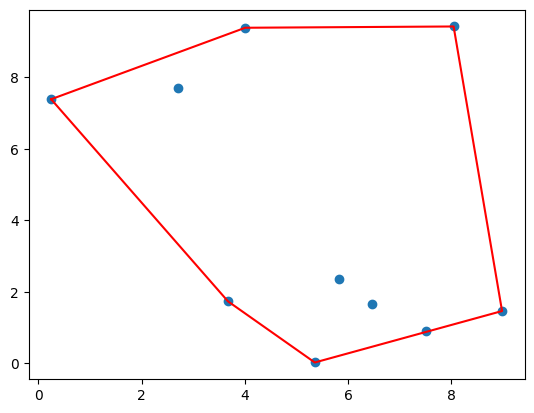

In [8]:
runProgram(10)